# Appendix A: Gaussian Distributions data

In [1]:
# Dependencies
import numpy as np #Matrix Algebra
import math
import pandas
import random
from scipy.stats import multivariate_normal

np.random.seed(11)

#Libraries used for ploting
import seaborn as sns ; sns.set() 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D


#### Define custom mean and covariance for 2D Normal Distributions:
Mean $\mu_{d}$ (2x1) =
$\left[ \begin{array}{cccc}
\mu_{11} \\
\mu_{21} \\\end{array} \right]$

Covariance $S_{d}$ (2x2) =  $\sum\limits_{i=x}^{f}(x-\mu_{d})(x-\mu_{d})^T$     =
$\left[ \begin{array}{cccc}
s_{11} & s_{12} \\
s_{21} & s_{22} \\  \end{array} \right]$ 

where:

d is the normal distribution (1 or 2), 

f is the number of data per distribution,

x is a point in the distribution

In [2]:
n1,n2=100,200
mean1 =np.array( [-3,8])
cov1 = np.array([[4,0], [0, 4]] )
mean2 = np.array([5, 1])
cov2 = np.array([[2, 0], [0, 2]])

In [3]:
g1=np.random.multivariate_normal(mean1.T, cov1, n1)
g2=np.random.multivariate_normal(mean2, cov2, n2)

#### Use Numpy random.multivariate_normal function to generate random normal distributions with f sample data each:

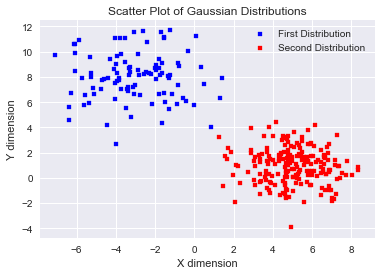

In [4]:
fig1= plt.figure()
ax = fig1.add_subplot(111)

ax.scatter(g1[:,0], g1[:,1], s=10, c='b', marker="s", label='First Distribution')
ax.scatter(g2[:,0],g2[:,1], s=10, c='r', marker="s", label='Second Distribution')

plt.title('Scatter Plot of Gaussian Distributions');
plt.legend(loc='upper right');
plt.xlabel('X dimension');
plt.ylabel('Y dimension');

#### Seperation of Data in terms of Direction x and y

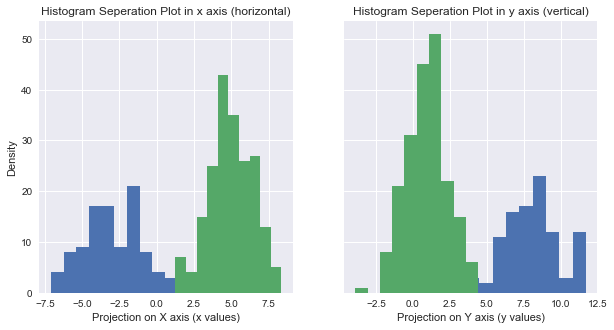

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5),sharey=True)

ax[0].hist(g1[:,0]);
ax[0].hist(g2[:,0]);
ax[0].title.set_text('Histogram Seperation Plot in x axis (horizontal)')
ax[0].set_xlabel('Projection on X axis (x values)')
ax[0].set_ylabel('Density')

ax[1].hist(g1[:,1]);
ax[1].hist(g2[:,1]);
ax[1].title.set_text('Histogram Seperation Plot in y axis (vertical)')
ax[1].set_xlabel('Projection on Y axis (y values)')
plt.show()

#### Question 1a:  4 illustrative choices for w

In [6]:
wt1 = np.array ( [5,2] )
wt2 = np.array ( [2,-10] )
wt3 = np.array ( [-2,-5] )
wt4 = np.array ( [1,7] )
wtest = np.vstack((wt1,wt2,wt3,wt4))
print('The directions w that will be tested')
print(wtest.T)

The directions w that will be tested
[[  5   2  -2   1]
 [  2 -10  -5   7]]


0
1


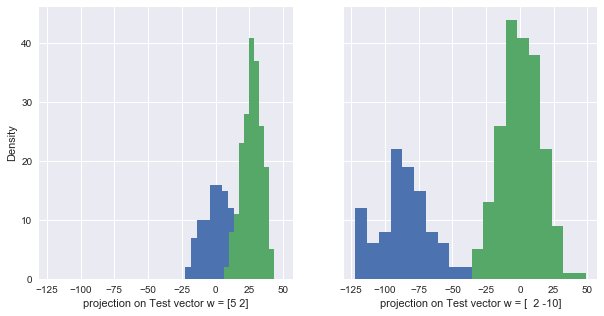

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5),sharex=True, sharey=True)
for i in  range(2):
    wt=wtest[i,:]
    print(i)
    g1_wt=np.dot(g1,wt.T)
    g2_wt=np.dot(g2,wt.T) 
    ax[i].hist(g1_wt[:]); #blue
    ax[i].hist(g2_wt[:]); #green
    #ax[i].title.set_text('Histogram Plot {} with Test vector w = {} '.format(i,wt))
    ax[i].set_xlabel('projection on Test vector w = {}'.format (wt))
    ax[0].set_ylabel('Density')
    #ax[i].legend(loc="upper right")
plt.show()

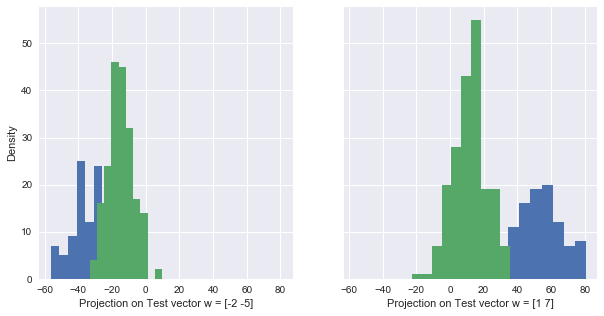

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5),sharex=True, sharey=True)
for i in  range(2,4):
    wt=wtest[i,:]
    #print(wt)
    g1_wt=np.dot(g1,wt.T)
    g2_wt=np.dot(g2,wt.T) 
    ax[i-2].hist(g1_wt[:]); #blue
    ax[i-2].hist(g2_wt[:]); #green
    #ax[i-2].title.set_text('Histogram Plot {} with Test vector w = {} '.format(i,wt))
    ax[i-2].set_xlabel('Projection on Test vector w = {}'.format (wt))
    ax[0].set_ylabel('Density')
    #ax[i].legend(loc="upper right")
plt.show()

#### Question 1b: Plot the dependence of F(w) on the direction of w

In [9]:
wr = np.zeros((2,1))
Fw_max=0
xrag=np.linspace(1,360,360)
wr_init = np.array([[0.], [1.]])
theta=0
print(wr_init)
fhist=[]
wopt=np.zeros((2,1))

[[0.]
 [1.]]


In [10]:
for theta in xrag:
    theta=math.radians(theta)
    
    T=[[math.cos(theta),math.sin(theta)],[math.sin(theta),math.cos(theta)]]
    wr=np.dot(T,wr_init)
    
    #print('Theta =',theta)
    #print('Rotary w is:')
    #print(wr)
    #print('')
    
    #Calculation of F(w)
    g1_wr = np.dot(g1,wr)
    g2_wr = np.dot(g2,wr)

    m1_wr = np.mean (g1_wr)
    m2_wr = np.mean (g2_wr)

    s1_wr = sum((g1_wr-m1_wr)**2)/n1
    s2_wr = sum((g2_wr-m2_wr)**2)/n2

    nA=n1/(n1+n2)
    nB=n2/(n1+n2)

    t1=(m1_wr-m2_wr)**2
    t2=np.dot(nA,s1_wr)+np.dot(nB,s2_wr)

    Fw=t1/t2
    #print('Fw',Fw)
    fhist.append(Fw)
    
    #Store wopt for argmax(F(w))
    if Fw > Fw_max :
        wopt=wr
        Fw_max=Fw
        #print(Fw,wopt)
    
    
theta=0    
#print(wr_init)

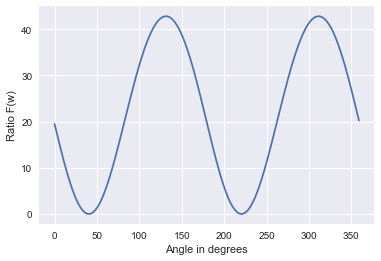

In [11]:
plt.plot(fhist)
plt.xlabel('Angle in degrees')
plt.ylabel('Ratio F(w)')
plt.show()

In [12]:
print('Optimal w:           ','Maximum F(w):' )
print(wopt,'     ',Fw_max)

Optimal w:            Maximum F(w):
[[-0.74314483]
 [ 0.66913061]]       [42.82732271]


#### Question 2a: plot the equi-probable contour lines for each class and draw the direction of the optimal choice vector w.

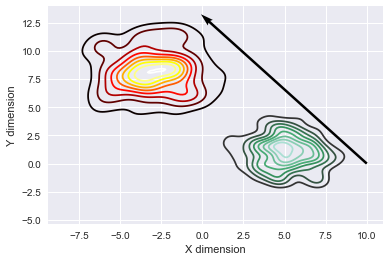

In [13]:
fig= plt.figure()
ax = fig.add_subplot(111)
sns.kdeplot(g1[:,0], g1[:,1],cmap='hot')
sns.kdeplot(g2[:,0], g2[:,1])
plt.quiver(10,0,wopt[0][0],wopt[1][0],scale=1.5)
plt.xlabel('X dimension');
plt.ylabel('Y dimension');
plt.show()

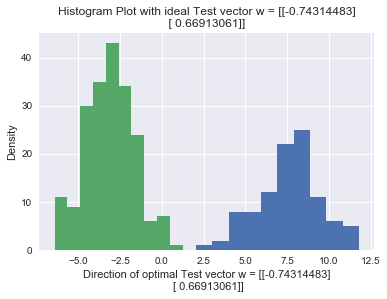

In [14]:
gn1=np.dot(g1,wopt)
gn2=np.dot(g2,wopt)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(gn1[:]); #blue
ax.hist(gn2[:]); #green
ax.title.set_text('Histogram Plot with ideal Test vector w = {} '.format(wopt))
ax.set_xlabel('Direction of optimal Test vector w = {}'.format (wopt))
ax.set_ylabel('Density')
plt.show()

#### Question 2b: Log-odds and Decision Boundary

##### Case Sa != Sb

In [15]:
n1,n2=10000,5000
mean1 =np.array( [-1,5])
cov1 = np.array([[1,0], [0, 1]] )
mean2 = np.array([4, 12])
cov2 = np.array([[5, 0], [0, 5]])

d1 = np.random.multivariate_normal(mean1, cov1, n1)
d2 = np.random.multivariate_normal(mean2, cov2, n2)

In [16]:
x, y = np.mgrid[-10:20:.01, -10:20:.01]
pos = np.dstack((x, y))
v1 = multivariate_normal(mean1, cov1)
v2 = multivariate_normal(mean2, cov2)
log1=v1.logpdf(pos)
log2=v2.logpdf(pos)
ratio=log1-log2

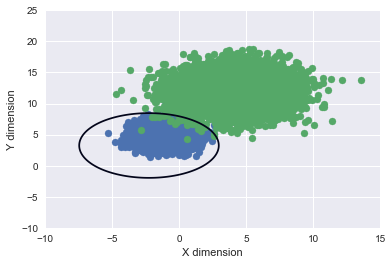

In [17]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, ratio, levels=[0])
ax2.set_xlim([-10,15])
ax2.set_ylim([-10,25])
plt.scatter(d1[:,0],d1[:,1])
plt.scatter(d2[:,0],d2[:,1])
plt.xlabel('X dimension');
plt.ylabel('Y dimension');
plt.show()

##### Case Sa = Sb

In [18]:
n1,n2=10000,5000
mean1 =np.array( [1,2])
cov1 = np.array([[1,0], [0, 1]] )
mean2 = np.array([4, 7])
cov2 = np.array([[1, 0], [0, 1]])

d1 = np.random.multivariate_normal(mean1, cov1, n1)
d2 = np.random.multivariate_normal(mean2, cov2, n2)

In [19]:
x, y = np.mgrid[-5:10:.01, -5:10:.01]
pos = np.dstack((x, y))
v1 = multivariate_normal(mean1, cov1)
v2 = multivariate_normal(mean2, cov2)
log1=v1.logpdf(pos)
log2=v2.logpdf(pos)
ratio=log1-log2

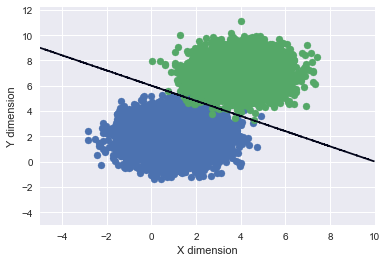

In [20]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, ratio, levels=[0])
plt.scatter(d1[:,0],d1[:,1])
plt.scatter(d2[:,0],d2[:,1])
plt.xlabel('X dimension');
plt.ylabel('Y dimension');
plt.show()

#### Question 2c: Unbalanced formula for the discriminant

In [21]:
wr = np.zeros((2,1))
Fw_max=0
xrag=np.linspace(1,360,360)
wr_init = np.array([[0.], [1.]])
theta=0
print(wr_init)
f1hist=[]
wopt=np.zeros((2,1))

[[0.]
 [1.]]


#### Unbalanced ratio

In [22]:
for theta in xrag:
    theta=math.radians(theta)
    
    #wr[0] = wr_init[0]* math.cos(math.radians(theta))- wr_init[1]*math.sin(math.radians(theta))
    #wr[1] = wr_init[0]* math.sin(math.radians(theta)) + wr_init[1]*math.cos(math.radians(theta))
    
    T=[[math.cos(theta),math.sin(theta)],[math.sin(theta),math.cos(theta)]]
    wr=np.dot(T,wr_init)
    
    #print('Theta =',theta)
    #print('Rotary w is:')
    #print(wr)
    #print('')
    
    g1_wr = np.dot(g1,wr)
    g2_wr = np.dot(g2,wr)

    m1_wr = np.mean (g1_wr)
    m2_wr = np.mean (g2_wr)

    s1_wr = sum((g1_wr-m1_wr)**2)/n1
    s2_wr = sum((g2_wr-m2_wr)**2)/n2

    t1=(m1_wr-m2_wr)**2
    t2=s1_wr+s2_wr

    Fw=t1/t2
    #print('Fw',Fw)
    f1hist.append(Fw)
    
   
     
    if Fw > Fw_max :
        wopt=wr
        Fw_max=Fw
        #print(Fw,wopt)
    
    
theta=0    
#print(wr_init)

In [23]:
wopt

array([[-0.7313537 ],
       [ 0.68199836]])